<a href="https://colab.research.google.com/github/shresth97/ML_repo/blob/main/Grip_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation Internship**

##**Name : Shresth Mittal**

##**TASK-2 : Prediction Using Unsupervised Machine Learning Technique**

###Importing the required Modules and Libraries

In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

###Importing the Dataset

In [69]:
dataset = pd.read_csv("/content/drive/MyDrive/Iris.csv") #Importing the dataset from Drive by copying its path but we can also import it 
                                                         #using "from sklearn.datasets import load_iris"

In [70]:
dataset.head() #To Have a look at first 5 rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
dataset.shape

(150, 6)

###**Finding Optimum Numbers of Clusters for KMeans Classification**

In [72]:
X = dataset.iloc[:, [1,2,3,4]].values #we are not selecting the 0th index here because its not a feature of iris flower and may interrupt out computation
X 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

##**Using Elbow method to find the optimum number of clusters**

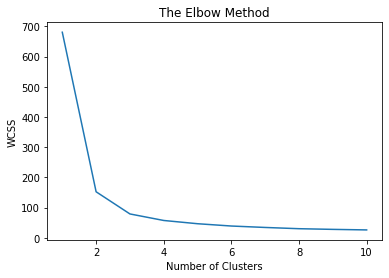

In [73]:
wcss = []  #Creating a list for "WCSS Within Cluster Sum of Squared"

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)  #inertia measures how well a dataset was clustered by K-Means. 
                                #It is calculated by measuring the distance between each data point
                                #and its centroid, squaring this distance, and summing these squares across one cluster.
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

As the name suggests "The Elbow Method" we have to select the 
the value of clusters where our "Elbow" is being formed, and from above graph it is rather clear that the elbow is being formed at "3".
So, 3 will be our optimal number of clusters for this situation.Therefore,

##**Training the K-Means model on the dataset**

In [74]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state= 0) #by_default(max_iter =300, n_init= 10)
y_kmeans = kmeans.fit_predict(X)

In [75]:
print(y_kmeans)
print(y_kmeans.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)


##**Visualising the Clusters**

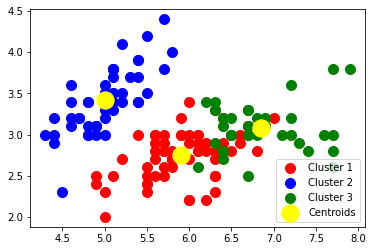

In [76]:
#VISUALISING THE CLUSTERS
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s= 100, c = 'red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s= 100, c = 'blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s= 100, c = 'green', label = "Cluster 3")

#PLOTTING THE CENTROIDS
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label = 'Centroids')
plt.legend()
plt.show()